In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Data Exploration

In [2]:
# Load dataset
filename = "dataset/survey_results_public.csv"
df = pd.read_csv(filename, low_memory=False)

In [3]:
# Look at df shape and other info
print("DF Shape", df.shape)
print("Columns:", df.columns.tolist())
df.info()

DF Shape (98855, 129)
Columns: ['Respondent', 'Hobby', 'OpenSource', 'Country', 'Student', 'Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType', 'YearsCoding', 'YearsCodingProf', 'JobSatisfaction', 'CareerSatisfaction', 'HopeFiveYears', 'JobSearchStatus', 'LastNewJob', 'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 'AssessJob6', 'AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10', 'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 'AssessBenefits6', 'AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11', 'JobContactPriorities1', 'JobContactPriorities2', 'JobContactPriorities3', 'JobContactPriorities4', 'JobContactPriorities5', 'JobEmailPriorities1', 'JobEmailPriorities2', 'JobEmailPriorities3', 'JobEmailPriorities4', 'JobEmailPriorities5', 'JobEmailPriorities6', 'JobEmailPriorities7', 'UpdateCV', 'Currency', 'Salary', 'SalaryType', 'ConvertedSalary', 'C

In [4]:
# See what percent of each column is missing, sort by those with most missing
missing_counts = (df.isnull().mean() * 100).sort_values(ascending=False)
print(missing_counts)

TimeAfterBootcamp    93.270952
MilitaryUS           84.036215
HackathonReasons     74.011431
ErgonomicDevices     65.547519
AdBlockerReasons     61.817814
                       ...    
Employment            3.574933
Country               0.416772
Hobby                 0.000000
OpenSource            0.000000
Respondent            0.000000
Length: 129, dtype: float64


In [5]:
# Check to make sure there are no duplicate rowws
duplicates = df.duplicated().sum()
print(duplicates)

0


In [6]:
# Print other useful data info
# df.describe()
df.describe(include=[np.number])
# df.describe(include=[object, 'category'])

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


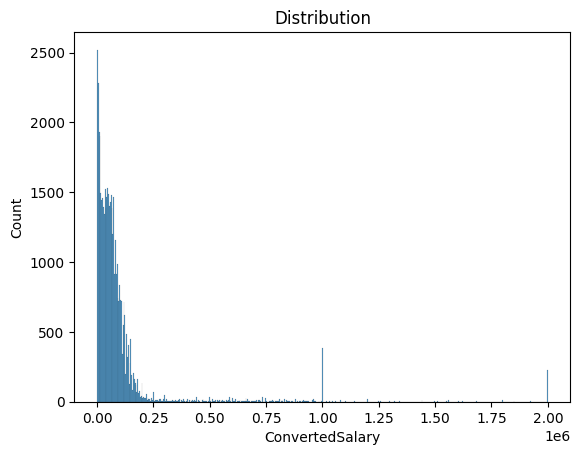

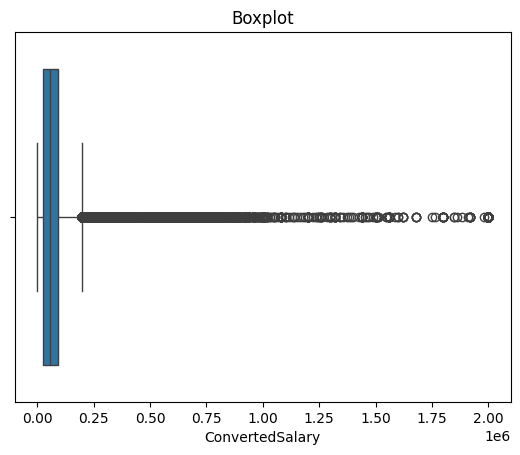

In [7]:
# Check what distribution salary has
# Not sure if I really need to do this but why not
sns.histplot(df["ConvertedSalary"])
plt.title("Distribution")
plt.show()

sns.boxplot(x=df["ConvertedSalary"])
plt.title("Boxplot")
plt.show()

# Modeling

In [ ]:
# Re-Load dataset
filename = "dataset/survey_results_public.csv"
df = pd.read_csv(filename, low_memory=False)

# Encode categorical data
education_encoding_map = {
    "I never completed any formal education": 0,
    "Primary/elementary school": 1,
    "Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)": 2,
    "Some college/university study without earning a degree": 3,
    "Associate degree": 4,
    "Bachelor's degree (BA, BS, B.Eng., etc.)": 5,
    "Master's degree (MA, MS, M.Eng., MBA, etc.)": 6,
    "Professional degree (JD, MD, etc.)": 7,
    "Other doctoral degree (Ph.D, Ed.D., etc.)": 8,
}
years_coding_encoding_map = {
    "0-2 years": 0,
    "3-5 years": 1,
    "6-8 years": 2,
    "9-11 years": 3,
    "12-14 years": 4,
    "15-17 years": 5,
    "18-20 years": 6,
    "21-23 years": 7,
    "24-26 years": 8,
    "27-29 years": 9,
    "30 or more years": 10,
}
hours_computer_encoding_mapping = {
    "Less than 1 hour": 0,
    "1 - 4 hours": 1,
    "5 - 8 hours": 2,
    "9 - 12 hours": 3,
    "Over 12 hours": 4,
}
df["FormalEducation"] = df["FormalEducation"].map(education_encoding_map)
df["YearsCoding"] = df["YearsCoding"].map(years_coding_encoding_map)
df["HoursComputer"] = df["HoursComputer"].map(hours_computer_encoding_mapping)

# Filter columns and remove NULLS
cols = ["FormalEducation", "YearsCoding", "HoursComputer", "ConvertedSalary"]
df_encoded = df[cols]
df_encoded = df_encoded.dropna()

In [ ]:
# Get X and y variables
X = df_encoded.drop("ConvertedSalary", axis=1)
y = df_encoded["ConvertedSalary"]

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=11
)

# Convert to numpy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()
y_train_np = y_train.to_numpy()
y_test_np = y_test.to_numpy()

# samples and features
n_samples, n_features = X_train_np.shape

In [ ]:
# Initialize weights/bias
weights = np.zeros(n_features)
bias = 1
learning_rate = 0.001
epochs = 5000

In [ ]:
# Gradient Descent
for epoch in range(epochs):
    y_predicted = np.dot(X_train_np, weights) + bias

    # gradients
    dw = (1 / n_samples) * np.dot(X_train_np.T, (y_predicted - y_train_np))
    db = (1 / n_samples) * np.sum(y_predicted - y_train_np)

    # weights and biases
    weights -= learning_rate * dw
    bias -= learning_rate * db

In [ ]:
y_test_pred = np.dot(X_test_np, weights) + bias
mse_test = np.mean((y_test_pred - y_test_np) ** 2)
print("MSE: ", mse_test)

print("Weights: ", weights)
print("Bias: ", bias)
print("New y predictions: ", y_test_pred)